# Read file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import pickle

# Plot categories

In [2]:
with open('files/to_plot/categories_count.txt', 'rb') as handle:
    categories_counter = pickle.loads(handle.read())

In [3]:
sorted_desc = dict( sorted(categories_counter.items(), key=operator.itemgetter(1),reverse=True))

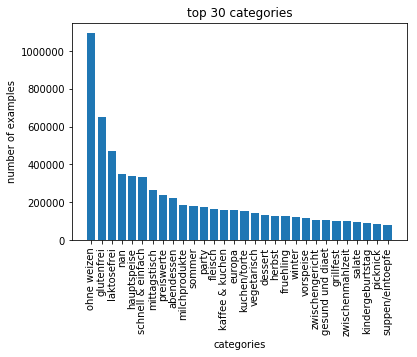

In [4]:
# take only n top results
n = 30
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

plt.bar(range(n), n_values)
plt.ylabel('number of examples')
plt.title('top '+str(n)+' categories')
plt.xlabel('categories')
plt.xticks(range(n), n_keys, rotation='vertical')
plt.show()

# Plotly settings

In [5]:
import plotly 
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

In [6]:
with open('plotly_config.txt') as file:
    content = file.read()
    
username, api_key = content.split(';')
print('usename:', username, '\napi_key:', api_key)

usename: pjakimow 
api_key: UT7n6mGSGg5xLPz8SD1c


In [7]:
plotly.tools.set_credentials_file(username=username, api_key=api_key)

# Plot by season

In [8]:
with open('files/to_plot/categories_by_season.txt', 'rb') as handle:
    categories_season = pickle.loads(handle.read())

In [9]:
# both seasons
labels = list(categories_season.keys())

sorted_desc = dict(sorted(categories_season[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace1 = go.Bar(x=n_keys, y=n_values)

sorted_desc = dict(sorted(categories_season[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace2 = go.Bar(x=n_keys, y=n_values)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=(labels[0], labels[1]))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

layout = {
    'height': 600,
    'width': 800,
    'yaxis': {'title': 'number of examples'},
    'title': 'Top ' + str(n) + ' categories',
    'showlegend': False
};
fig['layout'].update(layout)

py.iplot(fig, filename='all_cities_both_seasons')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [10]:
# summer
sorted_desc = dict(sorted(categories_season['summer'].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
  #'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top '+str(n)+' categories' + '<br> (summer)'
};
py.iplot({'data': data, 'layout': layout}, filename='all_cities_summer')

In [11]:
# winter
sorted_desc = dict(sorted(categories_season['winter'].items(), key=operator.itemgetter(1),reverse=True))
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
 # 'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top '+str(n)+' categories' + '<br> (winter)'
};
py.iplot({'data': data, 'layout': layout}, filename='all_cities_winter')

# Plot by city

In [12]:
with open('files/to_plot/categories_by_city.txt', 'rb') as handle:
    categories_city = pickle.loads(handle.read())

In [13]:
cities_pairs = [('Berlin', 'Potsdam'), ('Koeln', 'Siegen'), ('Frankfurt_Am_Main', 'Darmstadt'), ('Munich', 'Erlangen'), ('Hamburg', 'Bremerhaven')]

In [14]:
# choose a city
chosen_city = cities_pairs[0][0] # BERLIN
#chosen_city = cities_pairs[0][1] # POTSDAM
#chosen_city = cities_pairs[1][0] # KOELN
#chosen_city = cities_pairs[1][1] # SIEGEN
#chosen_city = cities_pairs[2][0] # FRANKFURT
#chosen_city = cities_pairs[2][1] # DARMSTADT
#chosen_city = cities_pairs[3][0] # MUNICH
#chosen_city = cities_pairs[3][1] # ERLANGEN
#chosen_city = cities_pairs[4][0] # HAMBURG
#chosen_city = cities_pairs[4][1] # BREMERHAVEN

In [15]:
sorted_desc = dict(sorted(categories_city[chosen_city].items(), key=operator.itemgetter(1),reverse=True))
n = 20
n_keys = list(sorted_desc.keys())[:n]
n_values = [v for k, v in list(sorted_desc.items())[:n]]

trace = {
  'x': n_keys,
  'y': n_values,
  'name': 'Trace',
  'type': 'bar'
 }
 
data = [trace];
layout = {
 # 'xaxis': {'title': 'categories'},
  'yaxis': {'title': 'number of examples'},
  'barmode': 'relative',
  'title': 'Top ' + str(n) + ' categories' + '<br> for ' + chosen_city
};
py.iplot({'data': data, 'layout': layout}, filename='top_categories_one_city')

## Plot both cities from pair

### Plots in one row

pair_number: number of pair

n: number of top n categories to show

In [16]:
def plot_categories_by_city(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name=labels[0])

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name=labels[1])

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=(labels[0], labels[1]))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout'].update(height=500, width=1000, title='Top ' + str(n) + ' categories')
    layout = {
        'yaxis': {'title': 'number of examples'},
    };
    fig['layout'].update(layout)
    
    return fig

In [17]:
def plot_group_barmode(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name=labels[0])

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name=labels[1])

    layout = go.Layout(
        barmode='group',
        title='Top ' + str(n) + ' categories',
        yaxis=dict(
            title='number of examples',
            titlefont=dict(
                size=14,
                color='rgb(107, 107, 107)'
            ),
            tickfont=dict(
                size=12,
                color='rgb(107, 107, 107)'
            )
        ),
        legend=dict(
            x=1,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        )
    )

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    
    return fig

In [18]:
def plot_overlay_barmode(categories_city, cities_pairs, pair_nr, n):
    labels = list(cities_pairs[pair_nr])
    sorted_desc = dict(sorted(categories_city[labels[0]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name=labels[0])

    sorted_desc = dict(sorted(categories_city[labels[1]].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name=labels[1])

    layout = go.Layout(
        barmode='overlay',
        height=500,
        width=1000,
        title='Top ' + str(n) + ' categories',
        yaxis=dict(
            title='number of examples',
            titlefont=dict(
                size=14,
                color='rgb(107, 107, 107)'
            ),
            tickfont=dict(
                size=12,
                color='rgb(107, 107, 107)'
            )
        ),
        legend=dict(
            x=1,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        )
    )
        
    fig = go.Figure(data=[trace1, trace2], layout=layout)

    return fig

In [19]:
fig = plot_overlay_barmode(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

In [20]:
fig = plot_categories_by_city(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [21]:
fig = plot_group_barmode(categories_city, cities_pairs, pair_nr=0, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_0')

In [22]:
fig = plot_categories_by_city(categories_city, cities_pairs, pair_nr=1, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [23]:
fig = plot_categories_by_city(categories_city, cities_pairs, pair_nr=2, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_2')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [24]:
fig = plot_categories_by_city(categories_city, cities_pairs, pair_nr=3, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_3')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [25]:
fig = plot_categories_by_city(categories_city, cities_pairs, pair_nr=4, n=20)
py.iplot(fig, filename='top_categories_pair_of_cities_4')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



# Plot by season and city

In [26]:
def get_plot_summer_winter(cities_summer, cities_winter, city, n=20):
    sorted_desc = dict(sorted(cities_summer[city].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace1 = go.Bar(x=n_keys, y=n_values, name='summer')

    sorted_desc = dict(sorted(cities_winter[city].items(), key=operator.itemgetter(1),reverse=True))
    n_keys = list(sorted_desc.keys())[:n]
    n_values = [v for k, v in list(sorted_desc.items())[:n]]

    trace2 = go.Bar(x=n_keys, y=n_values, name='winter')

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('summer', 'winter'))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout'].update(height=500, width=1000, title='Top ' + str(n) + ' categories <br> for '+city)
    
    layout = {
        'yaxis': {'title': 'number of examples'},
    };
    fig['layout'].update(layout)

    return fig

In [27]:
with open('files/to_plot/categories_by_cities_summer.txt', 'rb') as handle:
    cities_summer = pickle.loads(handle.read())

In [28]:
with open('files/to_plot/categories_by_cities_winter.txt', 'rb') as handle:
    cities_winter = pickle.loads(handle.read())

In [29]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[0][0], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [30]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[0][1], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [31]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[1][0], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [32]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[1][1], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [33]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[2][0], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [34]:
fig = get_plot_summer_winter(cities_summer, cities_winter, cities_pairs[2][1], n=20)
py.iplot(fig, filename='plot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

